In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
merged = pd.read_csv("data/merged_data.csv")
train_call = pd.read_csv("data/Train_call.csv")
train_clinical = pd.read_csv("data/Train_clinical.csv")

<Axes: xlabel='Subgroup', ylabel='count'>

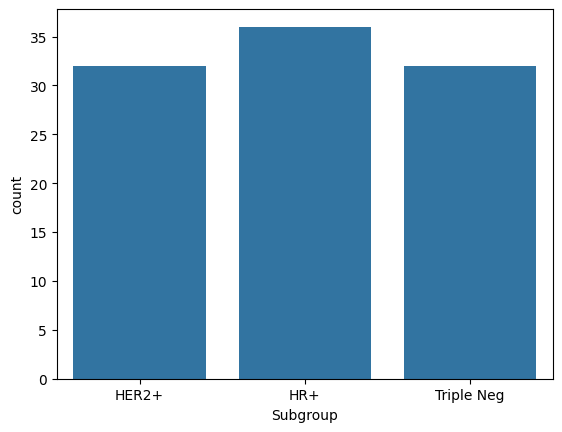

In [3]:
#some exploration
# merged.shape
# merged.head()
sns.countplot(x = 'Subgroup', data = merged)

              precision    recall  f1-score   support

       HER2+       0.86      1.00      0.92         6
         HR+       0.75      0.75      0.75         8
  Triple Neg       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.74      0.75      0.74        20



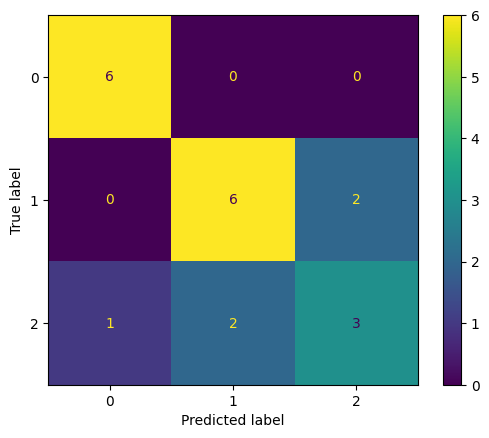

In [4]:
#Model training
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
labels = merged[['Sample', 'Subgroup']].set_index("Sample")
x = merged.drop(['Subgroup'], axis = 1).set_index("Sample")
y = labels.values.flatten()

#data splitten
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) 

#classifier
svm_clf = svm.SVC(kernel = 'linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

#accuracy, precision en recall checken
print(classification_report(y_test, y_pred))

#confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix= cm_svm).plot()

In [7]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from scipy import stats
from scipy.stats import uniform 

x = merged.drop(['Subgroup'], axis = 1).set_index("Sample")
y = labels.values.flatten()

svm_clf = svm.SVC(kernel = 'linear')

param_distributions = {
    "C": stats.uniform(0.1, 20),
    'kernel': ['linear', 'rbf', 'poly'],
             "gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001]}

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Inner cross-validation for parameter search
model = RandomizedSearchCV(
    estimator= svm_clf, param_distributions= param_distributions, cv=inner_cv, n_jobs=8
)
model.fit(x, y)
# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, x, y, cv=outer_cv, n_jobs=8)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

# if you want to see the parms you can use these print statements. 

best_model = model.best_estimator_

# Get the best parameters
best_params = model.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

The mean score using nested cross-validation is: 0.660 ± 0.128
Best Model: SVC(C=11.20186352992811, gamma=0.1, kernel='linear')
Best Parameters: {'C': 11.20186352992811, 'gamma': 0.1, 'kernel': 'linear'}


              precision    recall  f1-score   support

       HER2+       0.86      1.00      0.92         6
         HR+       0.75      0.75      0.75         8
  Triple Neg       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.74      0.75      0.74        20



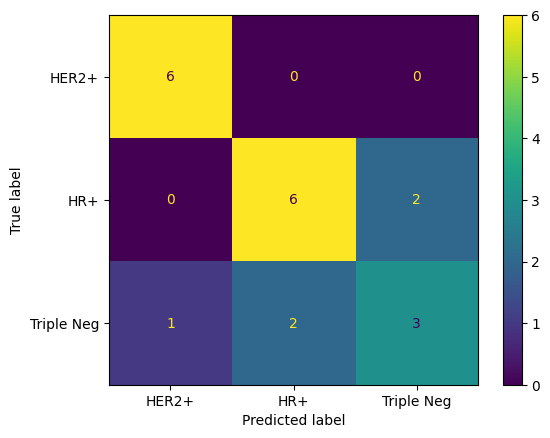

In [13]:
svm_clf_rand = SVC(C = 11.2, gamma = 0.1, kernel = 'linear')
svm_clf_rand.fit(X_train, y_train)
y_pred = svm_clf_rand.predict(X_test)

#accuracy, precision en recall checken
print(classification_report(y_test, y_pred))

#confusion matrix
cm_svm_rand = confusion_matrix(y_test, y_pred, labels=svm_clf_rand.classes_)
ConfusionMatrixDisplay(confusion_matrix= cm_svm_rand, display_labels=svm_clf_rand.classes_).plot()


In [ ]:
#hyperparameter tuning, je kan de C, de kernel en de gamma tunen
# from sklearn.model_selection import RandomizedSearchCV
# from scipy import stats
# from scipy.stats import uniform
# from sklearn.metrics import accuracy_score

# param_dist = {
#     'C': uniform(0.1, 20), 
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
# }

# param_dist = {
#     "C": stats.uniform(2, 30),
#     'kernel': ['linear', 'rbf', 'poly'],
#              "gamma": ["scale", "auto", 1, 0.1, 0.01, 0.001]}

# svm_hyper_rand = RandomizedSearchCV(estimator= svm_clf, param_distributions=param_dist, n_iter=20, cv=5)
# svm_hyper_rand.fit(X_train, y_train)

# # Get the best hyperparameters and model
# best_params_rand = svm_hyper_rand.best_params_
# best_model_rand = svm_hyper_rand.best_estimator_

# # Evaluate the best model
# y_pred_best_rand = best_model_rand.predict(X_test)
# accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
# print(f"Best SVM Accuracy: {accuracy_best_rand:.2f}")
# print(f"Best Hyperparameters: {best_params_rand}")